# 1. Gather Datasets

I am using student performance dataset from the UC Irvine Machine Learning Repository for this project. One of the datasets is for mathematics and the other set is for Portuguese. This was the most practical datasets to use because it has periodic grades recorded in it.

Source: UCI Machine Learning Repository – Student Performance Dataset.
https://archive.ics.uci.edu/ml/datasets/student+performance

# 2. Create a Data Dictionary
|Variable  Name	|Role|	Type|	Demographic|	Description	|Missing Values|
|------------	|----|	----|  ------------|---------------|--------------|
|school |	Feature	|Categorical|		|student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)	|	no|
|sex	|Feature    |Binary	|Sex	|student's sex (binary: 'F' - female or 'M' - male)	|	no|
|age	|Feature	|Integer	|Age	|student's age (numeric: from 15 to 22)		|no|
|address	|Feature	|Categorical	|	|student's home address type (binary: 'U' - urban or 'R' - rural)		|no|
|famsize	|Feature	|Categorical	|Other	|family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)		|no|
|Pstatus	|Feature	|Categorical	|Other	|parent's cohabitation status (binary: 'T' - living together or 'A' - apart)		|no|
|Medu	|Feature	|Integer	|Education Level	|mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)		|no|
|Fedu	|Feature	|Integer	|Education Level	|father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)		|no|
|Mjob	|Feature	|Categorical	|Occupation	|mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')		|no|
|Fjob	|Feature	|Categorical	|Occupation	|father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')		|no|
reason	|Feature	|Categorical	|	|reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')		|no|
|guardian	|Feature	|Categorical	|	|student's guardian (nominal: 'mother', 'father' or 'other')		|no|
|traveltime	|Feature	|Integer	|	|home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)		|no|
|studytime	|Feature	|Integer	|	|weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)		|no|
|failures	|Feature	|Integer	|	|number of past class failures (numeric: n if 1<=n<3, else 4)		|no|
|schoolsup	|Feature	|Binary	|	|extra educational support (binary: yes or no)		|no|
|famsup	|Feature	|Binary	|	|family educational support (binary: yes or no)		|no|
|paid	|Feature	|Binary	|	|extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)		|no|
|activities	|Feature	|Binary	|	|extra-curricular activities (binary: yes or no)		|no|
|nursery	|Feature	|Binary	|	|attended nursery school (binary: yes or no)		|no|
|higher	|Feature	|Binary	|	|wants to take higher education (binary: yes or no)		|no|
|internet	|Feature	|Binary	|	|Internet access at home (binary: yes or no)		|no|
|romantic	|Feature	|Binary	|	|with a romantic relationship (binary: yes or no)		|no|
|famrel	|Feature	|Integer	|	|quality of family relationships (numeric: from 1 - very bad to 5 - excellent)		|no|
|freetime	|Feature	|Integer	|	|free time after school (numeric: from 1 - very low to 5 - very high)		|no|
|goout	|Feature	|Integer	|	|going out with friends (numeric: from 1 - very low to 5 - very high)		|no|
|Dalc	|Feature	|Integer	|	|workday alcohol consumption (numeric: from 1 - very low to 5 - very high)		|no|
|Walc	|Feature	|Integer	|	|weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)		|no|
|health	|Feature	|Integer	|	|current health status (numeric: from 1 - very bad to 5 - very good)		|no|
|absences	|Feature	|Integer	|	|number of school absences (numeric: from 0 to 93)		|no|
|G1	|Target	|Categorical	|	|first period grade (numeric: from 0 to 20)		|no|
|G2	|Target	|Categorical	|	|second period grade (numeric: from 0 to 20)		|no|
|G3	|Target	|Integer	|	|final grade (numeric: from 0 to 20, output target)		|no|

# 3. Data Cleaning & Preprocessing
No need to drop or fill in missing data because the data is complete.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Specify the correct separator for the CSV files
X = pd.read_csv('student-mat.csv', sep=';')  # your feature columns
y_df = pd.read_csv('student-por.csv', sep=';')  # your target variable



In [24]:
# Check for duplicate rows in X
print(X.duplicated().sum())

# Show duplicate rows
print(X[X.duplicated()])

0
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]
Index: []

[0 rows x 33 columns]


In [25]:
# Use the final grade column 'G3' as the target
y = (y_df['G3'] >= 10).astype(int)  # 1 if passed, 0 if not


# Ensure X and y have the same number of samples
if len(X) != len(y):
    min_length = min(len(X), len(y))
    X = X[:min_length]
    y = y[:min_length]

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X)
# If y is categorical, convert it to numeric as well
if y.dtype == 'object':
    y = pd.get_dummies(y)
    # If y is now a DataFrame with more than one column, pick the correct target column
    y = y.iloc[:, 0]

scaler = StandardScaler()
X = scaler.fit_transform(X)

# 4. Data Visualization


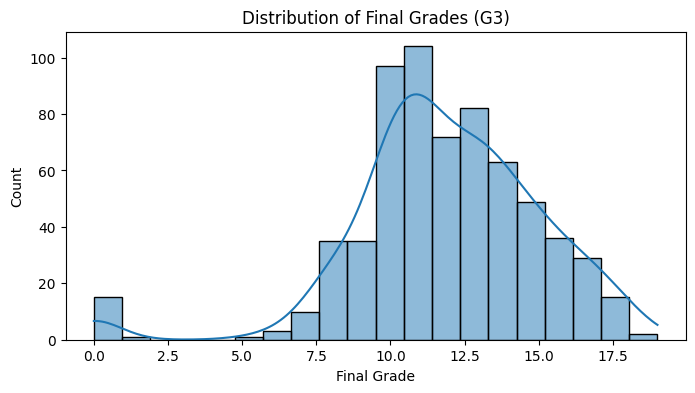

In [ ]:
# Histogram of final grades (G3)
plt.figure(figsize=(8,4))
sns.histplot(y_df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

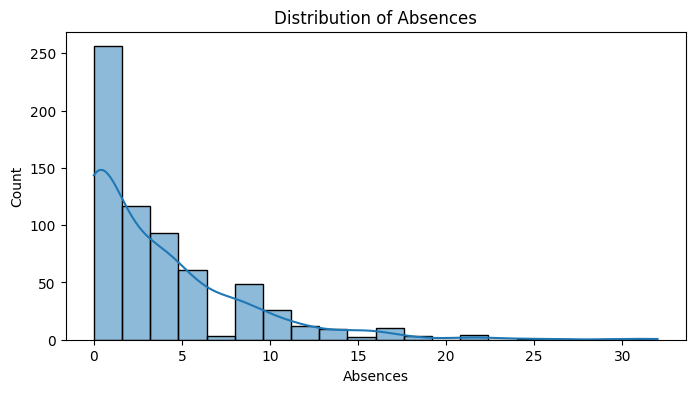

In [36]:
# Histogram: Distribution of absences
plt.figure(figsize=(8,4))
sns.histplot(y_df['absences'], bins=20, kde=True)
plt.title('Distribution of Absences')
plt.xlabel('Absences')
plt.ylabel('Count')
plt.show()

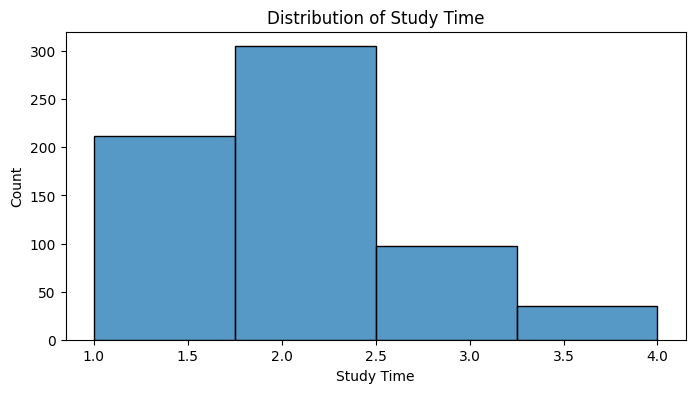

In [31]:
# Histogram: Distribution of studytime
plt.figure(figsize=(8,4))
sns.histplot(y_df['studytime'], bins=4, kde=False)
plt.title('Distribution of Study Time')
plt.xlabel('Study Time')
plt.ylabel('Count')
plt.show()


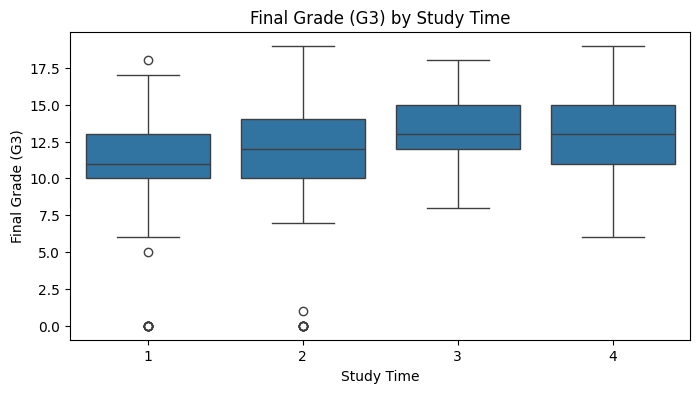

In [32]:
# Boxplot: G3 across studytime
plt.figure(figsize=(8,4))
sns.boxplot(x='studytime', y='G3', data=y_df)
plt.title('Final Grade (G3) by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()


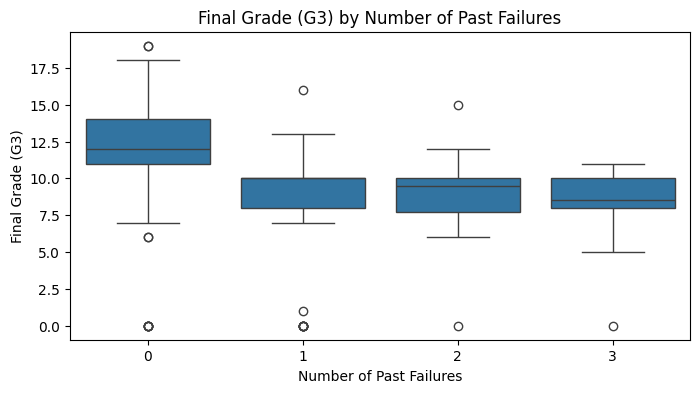

In [33]:
# Boxplot: G3 across failures
plt.figure(figsize=(8,4))
sns.boxplot(x='failures', y='G3', data=y_df)
plt.title('Final Grade (G3) by Number of Past Failures')
plt.xlabel('Number of Past Failures')
plt.ylabel('Final Grade (G3)')
plt.show()

Outliers in this context (students with unusual grades for their number of failures) may be important for understanding at-risk students or rare cases. There isn't clear data entry errors (e.g., impossible grades or failure counts), it is best to keep the outliers for educational data, as they can be meaningful.

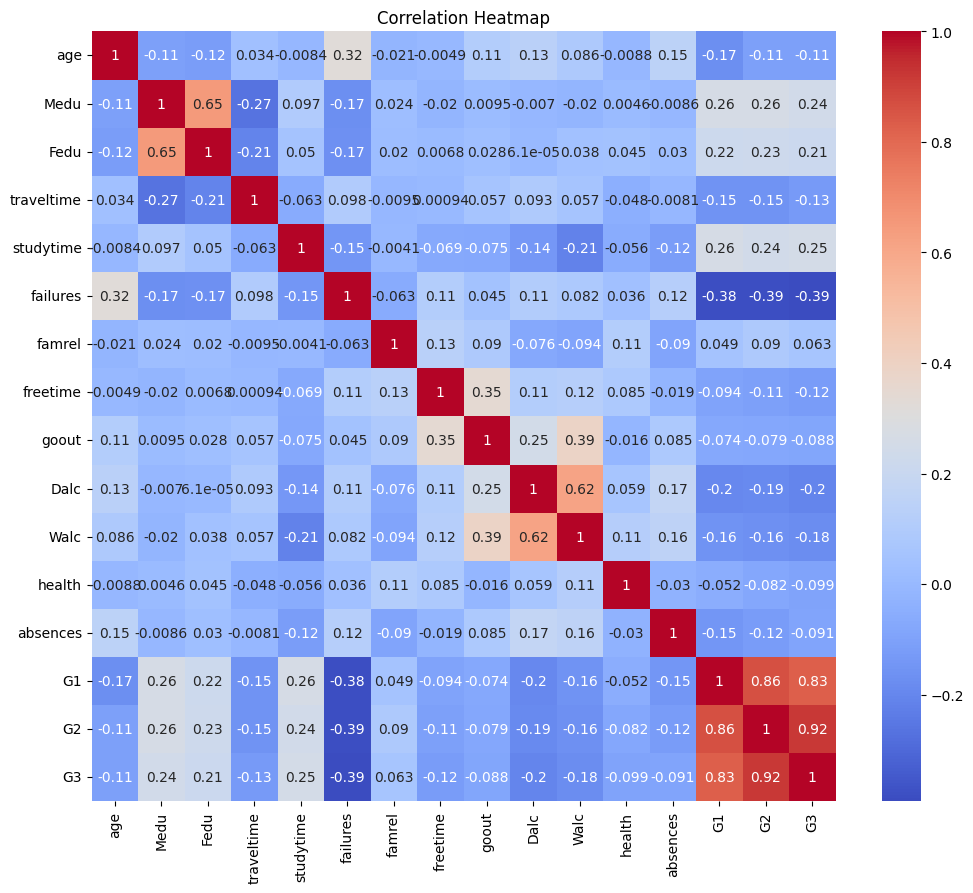

In [34]:
# Correlation heatmap
plt.figure(figsize=(12,10))
numeric_cols = y_df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 5. Feature Engineering & Selection


In [39]:
# Redo feature engineering using the original DataFrame before scaling
X_df = pd.read_csv('student-mat.csv', sep=';')

# Create average_grade feature
X_df['average_grade'] = (X_df['G1'] + X_df['G2']) / 2

# Create high_absentee binary feature
X_df['high_absentee'] = (X_df['absences'] > 10).astype(int)

# Convert categorical columns to numeric using one-hot encoding
X_df = pd.get_dummies(X_df)

# Select features for modeling (make sure these columns exist after get_dummies)
selected_features = [
    'sex_F', 'sex_M', 'age', 'studytime', 'failures', 'schoolsup_yes',
    'average_grade', 'absences', 'high_absentee'
]
X_selected = X_df[selected_features]

# 6. Baseline Model Implementation 
Train-Test Split

In [40]:


# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Baseline Model: Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


 Second Model: Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


Cross-Validation 

In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(log_model, X, y, cv=5, scoring='f1')
print("Cross-validated F1 scores (Logistic Regression):", cv_scores)
print("Mean F1:", cv_scores.mean())


Cross-validated F1 scores (Logistic Regression): [0.94666667 0.91780822 0.94666667 0.90277778 0.93959732]
Mean F1: 0.9307033291450869


# 7. Model Evaluation


Logistic Regression Results:
Accuracy: 0.9240506329113924
Precision: 0.9230769230769231
Recall: 1.0
F1 Score: 0.96

Random Forest Results:
Accuracy: 0.9113924050632911
Precision: 0.9113924050632911
Recall: 1.0
F1 Score: 0.9536423841059603


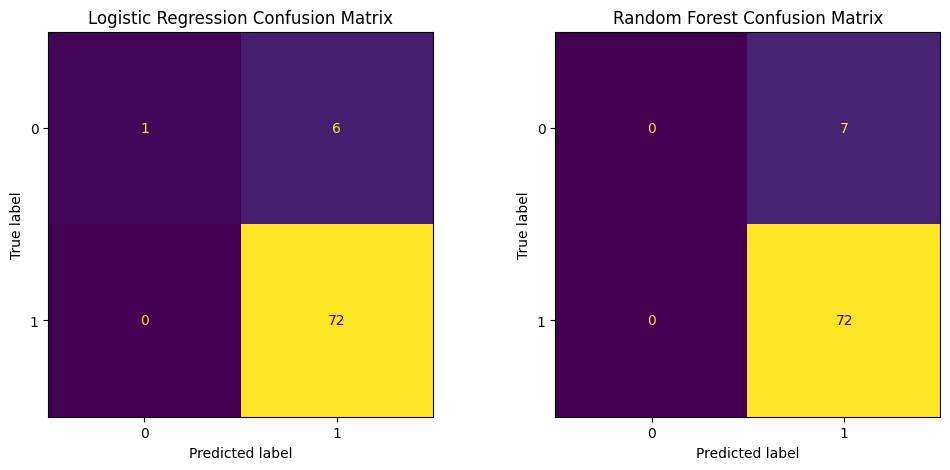

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

print("Logistic Regression Results:")
evaluate_model(y_test, y_pred_log)

print("\nRandom Forest Results:")
evaluate_model(y_test, y_pred_rf)

# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=axes[0], colorbar=False)
axes[0].set_title("Logistic Regression Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1], colorbar=False)
axes[1].set_title("Random Forest Confusion Matrix")
plt.show()
